In [145]:
!wget -nc 'https://drive.google.com/uc?id=1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco'  -O kitty3.png
!wget -nc 'https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL'  -O kitty55.png
!wget -nc 'https://drive.google.com/uc?id=1Jk0cEtQt4HxkLcKlmTHukpb22gJZ4dmL'  -O noisy_kitty55.png
!wget -nc 'https://drive.google.com/uc?id=1xCNA5338nzj1GgGQ5-oBA1dKCW1Mvn21'  -O hillbefore_noise10%.jpg

File ‘kitty3.png’ already there; not retrieving.
File ‘kitty55.png’ already there; not retrieving.
File ‘noisy_kitty55.png’ already there; not retrieving.
File ‘hillbefore_noise10%.jpg’ already there; not retrieving.


# Utility

In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def show_image(image_list,
               title_list = None,
               save_name = None):
    
    n_img = len(image_list)
    for i in range(n_img):
        plt.subplot(1, n_img, i+1)
        plt.imshow(image_list[i], cmap='gray')
        plt.title(title_list[i] if title_list is not None else '')
        plt.axis('off')

    if save_name != None:
        plt.savefig(save_name)
    
    plt.show()

In [148]:
def ILPF(M = None,
         N = None, 
         cut_off_freq = None
         ):
    x = np.linspace(-M//2, M//2, M)
    y = np.linspace(-N//2, N//2, N)

    i, j = np.meshgrid(x, y, sparse=True)

    filter = np.zeros((M, N), dtype=bool)
    filter = (i**2 + j**2) < cut_off_freq**2

    return filter

In [167]:
def gaussian_LPF(M = None, 
                 N = None,
                 cut_off_freq = None
                ):
    x = np.linspace(-M//2, M//2, M)
    y = np.linspace(-N//2, N//2, N)

    i, j = np.meshgrid(x, y, sparse=True)

    filter = np.zeros((M,N), dtype=np.uint8)
    filter = np.exp((-1*(i**2+j**2))/(2*cut_off_freq**2))

    return filter

In [149]:
def MSE(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError('Shape must be the same')
    
    m, n = image1.shape
    
    sse = 0
    for i in range(m):
        for j in range(n):
            sse += (image1[i][j].astype(float) - image2[i][j].astype(float))**2
    
    mse = (1/(m*n)) * sse

    return mse 

In [150]:
def PSNR(image1, image2, L = None):
    if L == None:
        raise ValueError('L must not be None')
    mse = MSE(image1, image2)

    psnr = 10 * np.log10(((L-1)**2)/(mse))

    return psnr


# Problem 1

KITTY POWER : 3.0476627332999996e+16


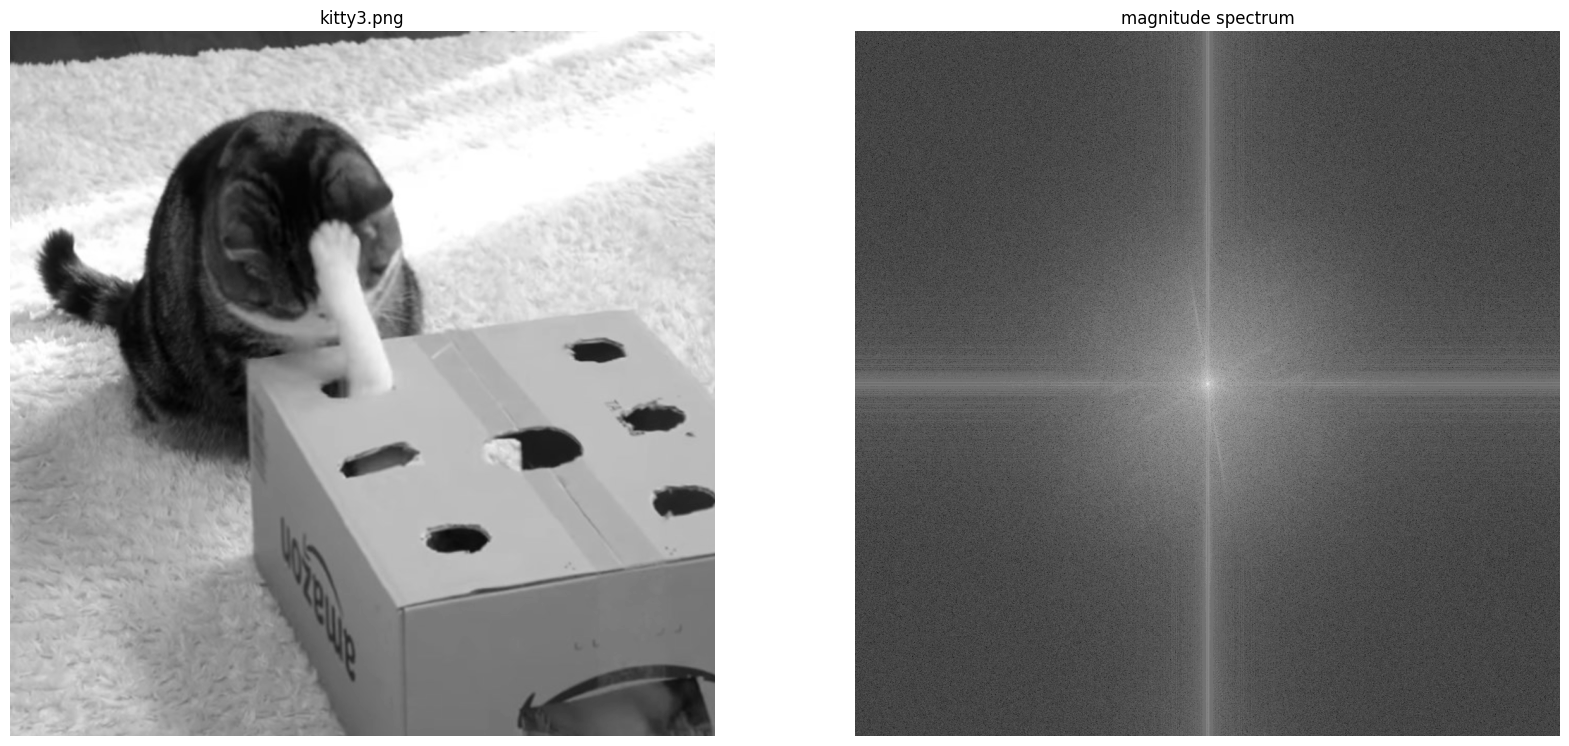

In [30]:
IMG_NAME = 'kitty3.png'

# load image
KITTY = cv2.imread(IMG_NAME, 0)

# FFT
kitty_fft = np.fft.fft2(KITTY)
kitty_fft_shifted = np.fft.fftshift(kitty_fft)
magnitude_spectrum_kitty = np.log(1 + np.abs(kitty_fft_shifted))

# Power 
kitty_power_map = np.real(kitty_fft_shifted)**2 + np.imag(kitty_fft_shifted)**2
KITTY_POWER = np.sum(kitty_power_map)

print(f'KITTY POWER : {KITTY_POWER}')

plt.figure(figsize=(20, 10))
show_image(image_list=[KITTY, magnitude_spectrum_kitty.astype(np.uint8)], 
           title_list=[IMG_NAME, 'magnitude spectrum'],
           save_name='original and FFT')

Text(0.5, 1.0, 'Ideal Low Pass Filter(D0 = 100)')

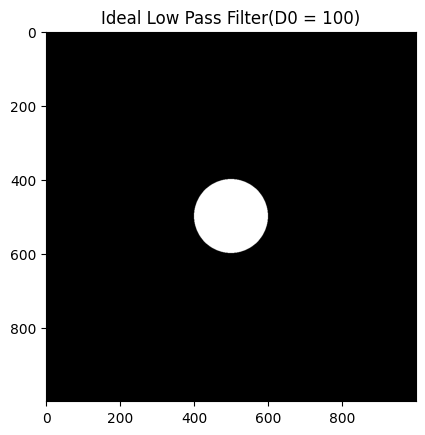

In [28]:
D0=100
filter = ILPF(KITTY.shape[0], 
              KITTY.shape[1], 
              D0)

plt.imshow(filter, cmap='gray')
plt.title(f'Ideal Low Pass Filter(D0 = {D0})')

In [51]:
target_d0 = None
target_filter = None
target_filtered_image = None
target_filtered_power_map = None
target_filtered_power = None
target_power_ratio = None

for D0 in range(max(KITTY.shape),0, -1):
    filter = ILPF(KITTY.shape[0],
                  KITTY.shape[1],
                  cut_off_freq=D0)
    filtered_image = kitty_fft_shifted * filter

    filtered_power_map = np.real(filtered_image)**2 + np.imag(filtered_image)**2
    filtered_power = np.sum(filtered_power_map)

    Power_ratio = round(filtered_power/KITTY_POWER*100,2)

    print(f'Current D0 = {D0}\t|Total power = {filtered_power}\t| Power Ratio = {Power_ratio} %')
    if Power_ratio < 99:
        print(f'Done!!! Minimum D0 is {D0+1}.')
        target_d0 = D0+1
        break

target_filter = ILPF(KITTY.shape[0],
                KITTY.shape[1],
                cut_off_freq=target_d0)

target_filtered_image = kitty_fft_shifted * filter
target_filtered_magnitude_spectrum = np.log(1 + np.abs(target_filtered_image))

target_filtered_image_ishifted =np.fft.ifftshift(target_filtered_image)
target_filtered_inverse = np.fft.ifft2(target_filtered_image_ishifted)

target_filtered_power_map = np.real(filtered_image)**2 + np.imag(filtered_image)**2
target_filtered_power = np.sum(filtered_power_map)

target_power_ratio = round(filtered_power/KITTY_POWER*100,2)


Current D0 = 1000	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 999	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 998	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 997	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 996	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 995	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 994	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 993	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 992	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 991	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 990	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 989	|Total power = 3.0476627332999996e+16	| Power Ratio = 100.0 %
Current D0 = 988	|Total power = 3.0476627332999996e

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_37544/3581162567.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  show_image(image_list=[KITTY, target_filter, target_filtered_magnitude_spectrum, target_filtered_inverse.astype(np.uint8)],


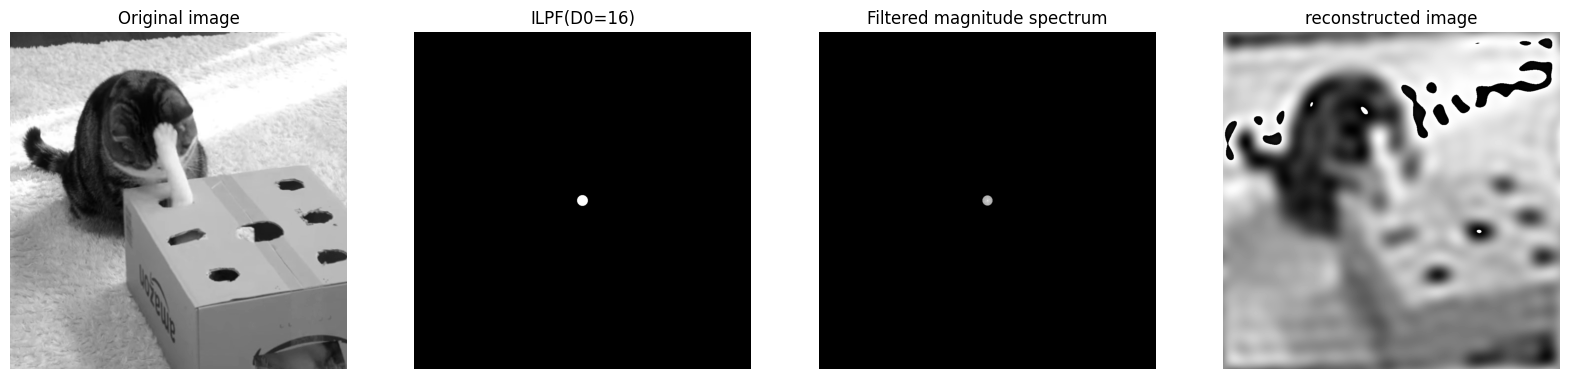

In [54]:
plt.figure(figsize=(20, 10))
show_image(image_list=[KITTY, target_filter, target_filtered_magnitude_spectrum, target_filtered_inverse.astype(np.uint8)],
           title_list=['Original image', f'ILPF(D0={target_d0})', 'Filtered magnitude spectrum', 'reconstructed image'],
           save_name='problem1.png')

# Problem 2

NOISY_KITTY PSNR = 10.48016049465457


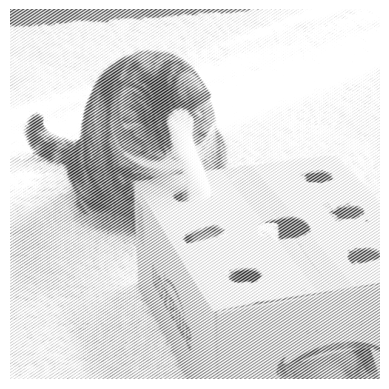

In [63]:
ORIGINAL_KITTY = cv2.imread('kitty55.png', 0)
NOISY_KITTY = cv2.imread('noisy_kitty55.png', 0)

NOISY_KITTY_PSNR = PSNR(NOISY_KITTY, ORIGINAL_KITTY, L=255)

print(f'NOISY_KITTY PSNR = {NOISY_KITTY_PSNR}')
show_image(image_list=[NOISY_KITTY])

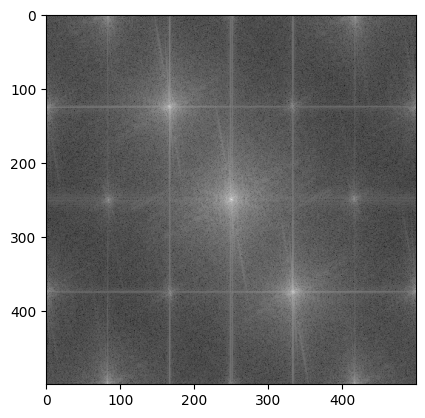

In [72]:
noisy_fft = np.fft.fft2(NOISY_KITTY)
noisy_fft_shifted = np.fft.fftshift(noisy_fft)
noisy_fft_shifted_magnitude_spectrum = np.log(1 + np.abs(noisy_fft_shifted))

plt.imshow(noisy_fft_shifted_magnitude_spectrum, cmap='gray')

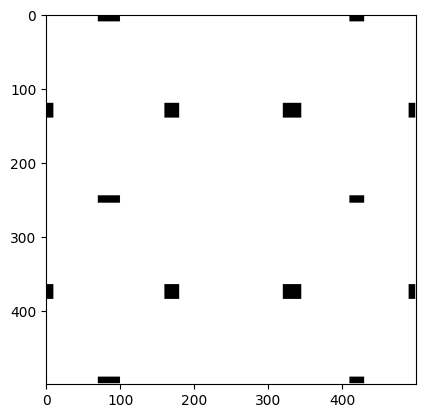

In [142]:
nx, ny = NOISY_KITTY.shape
x = np.linspace(0, nx, nx)
y = np.linspace(0, ny, ny)

i, j = np.meshgrid(x, y, sparse=True)

filter = ~(
    ((i>160) & (i<180) & (j<140) & (j>120)) | \
    ((i>0) & (i<10) & (j<140) & (j>120)) | \
    ((i>ny-10) & (i<ny) & (j<140) & (j>120)) | \
    ((i>320) & (i<345) & (j<385) & (j>365)) | \
    ((i>0) & (i<10) & (j<385) & (j>365)) | \
    ((i>ny-10) & (i<ny) & (j<385) & (j>365)) | \
    ((i>320) & (i<345) & (j<140) & (j>120)) | \
    ((i>160) & (i<180) & (j<385) & (j>365)) | \
    ((i>70) & (i<100) & (j<10) & (j>0)) | \
    ((i>70) & (i<100) & (j<nx) & (j>nx-10)) | \
    ((i>70) & (i<100) & (j<255) & (j>245)) | \
    ((i>410) & (i<430) & (j<255) & (j>245)) | \
    ((i>410) & (i<430) & (j<10) & (j>0)) | \
    ((i>410) & (i<430) & (j<nx) & (j>nx-10))
)
plt.imshow(filter, cmap='gray')
plt.savefig('notch filter.png')

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_37544/1677528517.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_image_inverse = np.fft.ifft2(np.fft.ifftshift(filtered_image)).astype(np.uint8)


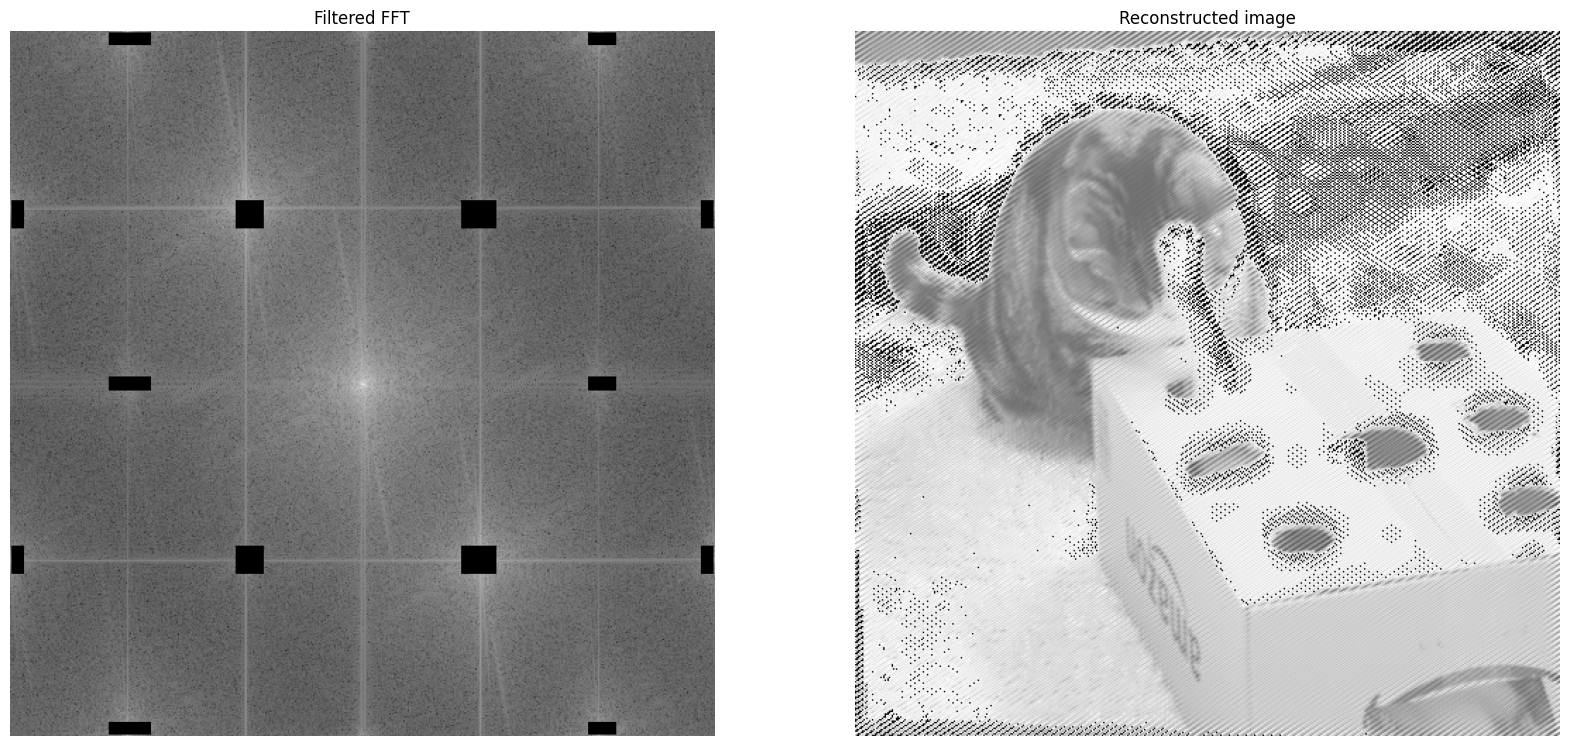

In [143]:
filtered_image = filter * noisy_fft_shifted
filtered_image_magnitude_spectrum = np.log(1 + np.abs(filtered_image))

filtered_image_inverse = np.fft.ifft2(np.fft.ifftshift(filtered_image)).astype(np.uint8)

plt.figure(figsize=(20, 10))
show_image(image_list=[filtered_image_magnitude_spectrum, filtered_image_inverse],
           title_list=['Filtered FFT', 'Reconstructed image'],
           save_name='reconstructed image'
)

In [144]:
new_psnr = PSNR(ORIGINAL_KITTY, filtered_image_inverse, L=255)
print(new_psnr)

8.538423956221498


# Problem 4

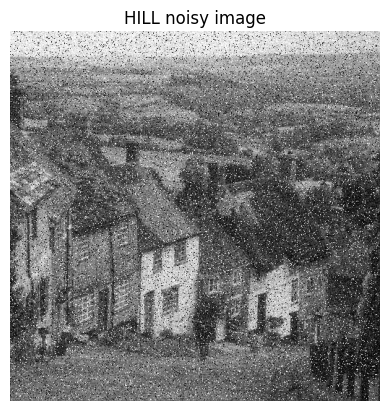

In [159]:
HILL = cv2.imread('hillbefore_noise10%.jpg', 0)

show_image(image_list=[HILL],
           title_list=['HILL noisy image'])

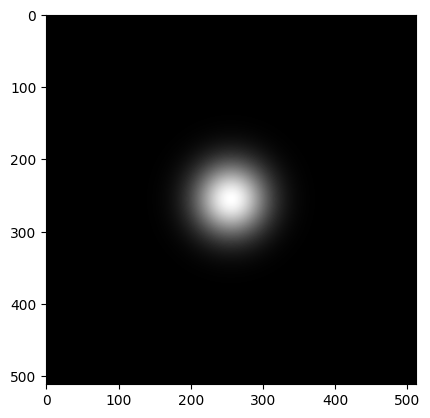

In [168]:
glpf = gaussian_LPF(HILL.shape[0], HILL.shape[1], 35)

plt.imshow(glpf, cmap='gray')

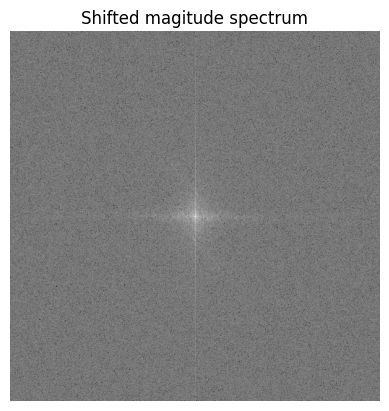

In [169]:
hill_fft = np.fft.fft2(HILL)
hill_fft_shifted = np.fft.fftshift(hill_fft)
hill_fft_shifted_magnitude_spectrum = np.log(1 + np.abs(hill_fft_shifted))

show_image(image_list=[hill_fft_shifted_magnitude_spectrum],
           title_list=['Shifted magitude spectrum'],
           save_name='problem 4.1.png')

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_37544/3505746437.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  hill_filtered_reconstruct = np.fft.ifft2(np.fft.ifftshift(hill_fft_filtered)).astype(np.uint8)


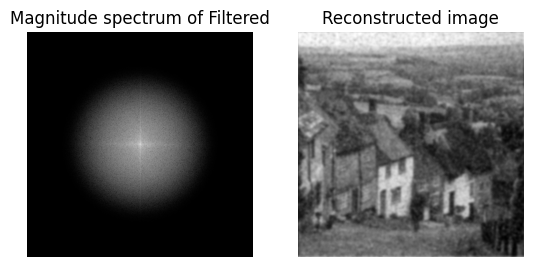

In [171]:
hill_fft_filtered = hill_fft_shifted * glpf
hill_fft_filtered_magnitude_spectrum = np.log(1 + np.abs(hill_fft_filtered))

hill_filtered_reconstruct = np.fft.ifft2(np.fft.ifftshift(hill_fft_filtered)).astype(np.uint8)

show_image(image_list=[hill_fft_filtered_magnitude_spectrum, hill_filtered_reconstruct],
           title_list=['Magnitude spectrum of Filtered', 'Reconstructed image'],
           save_name='problem 4.2-3.png')

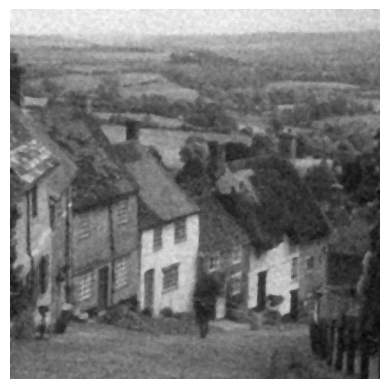

In [175]:
median_blur_hill = cv2.medianBlur(HILL, 5)

show_image(image_list=[median_blur_hill],
           save_name='median blur image.png')